# Lab Segmentation 1

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
import skimage.io as io
import numpy as np
import cv2
from skimage.feature import canny

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


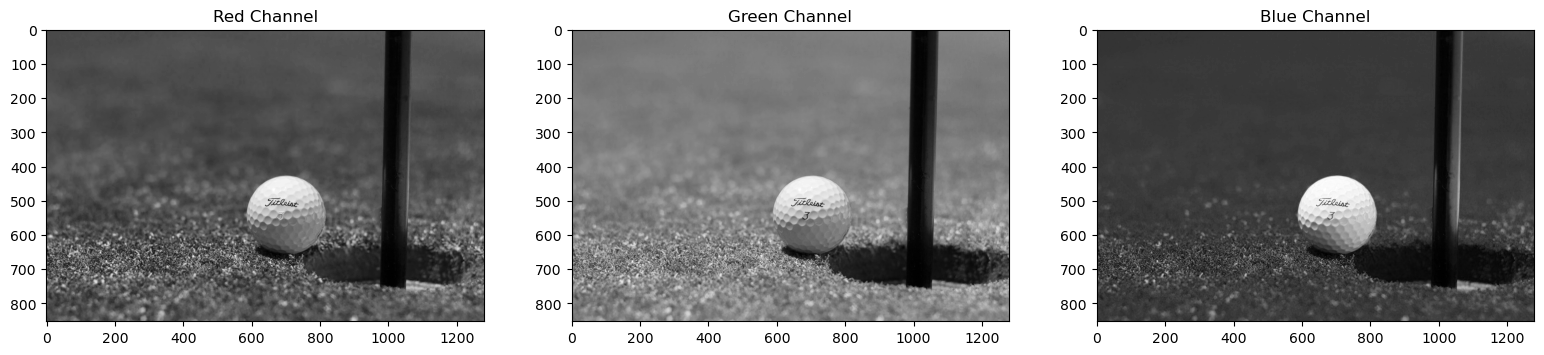

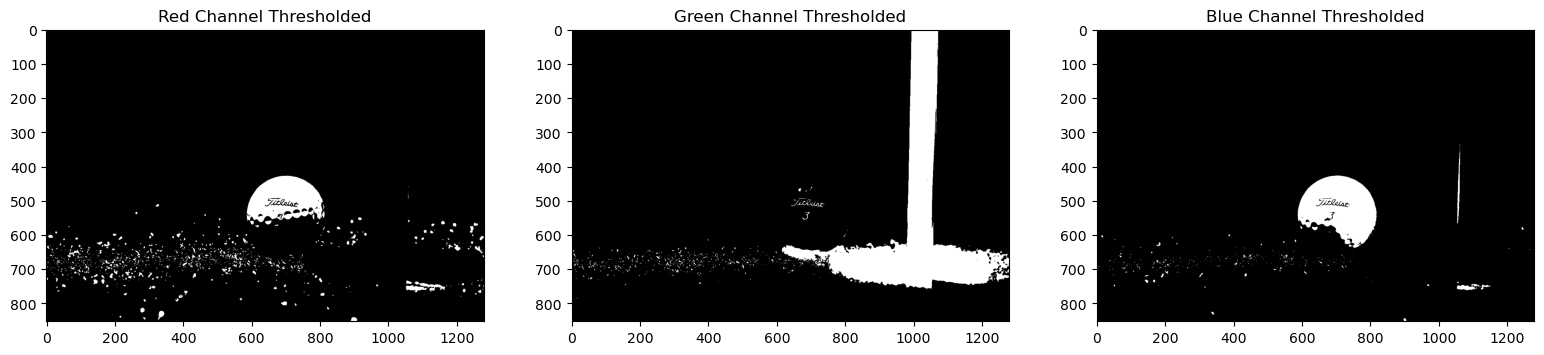

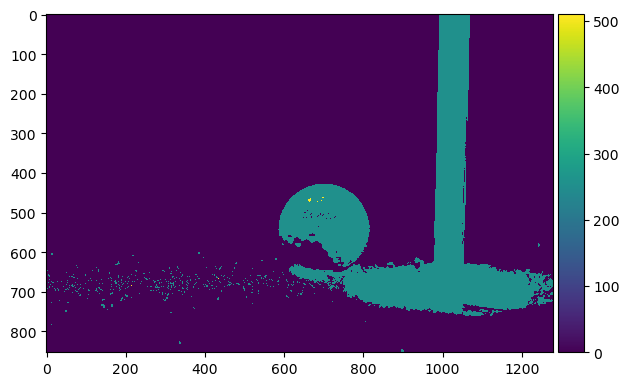

In [5]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf



# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold

# 6- display the binarized image

image = io.imread('imgs/exp1/golf.jpeg')
image = image.astype(float)

imgR = image[:,:,0]
imgG = image[:,:,1]
imgB = image[:,:,2]

imgRTh = np.where(imgR > 150, 255, 0)
imgGTh = imgG.copy()
imgGTh[imgGTh<70] = 0
imgGTh[imgGTh>=250] = 0
imgGTh[imgGTh>=70] = 255
imgGTh = 255-imgGTh
imgBTh = np.where(imgB > 140, 255, 0)

segmented = imgGTh + imgBTh

show_images([imgR, imgG, imgB], ['Red Channel', 'Green Channel', 'Blue Channel'])
show_images([imgRTh, imgGTh, imgBTh], ['Red Channel Thresholded', 'Green Channel Thresholded', 'Blue Channel Thresholded'])

io.imshow(segmented)
io.show()

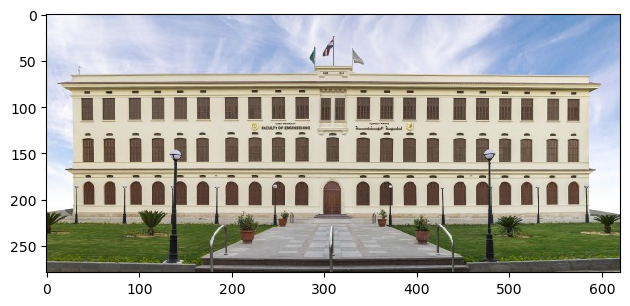

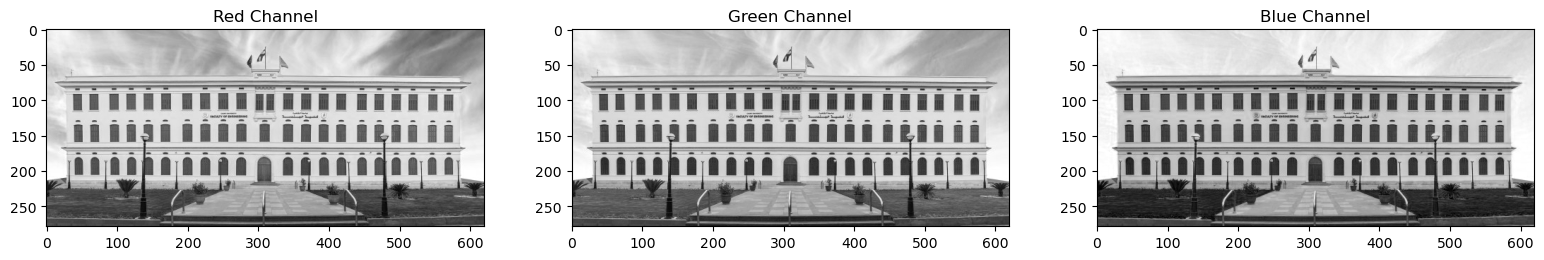

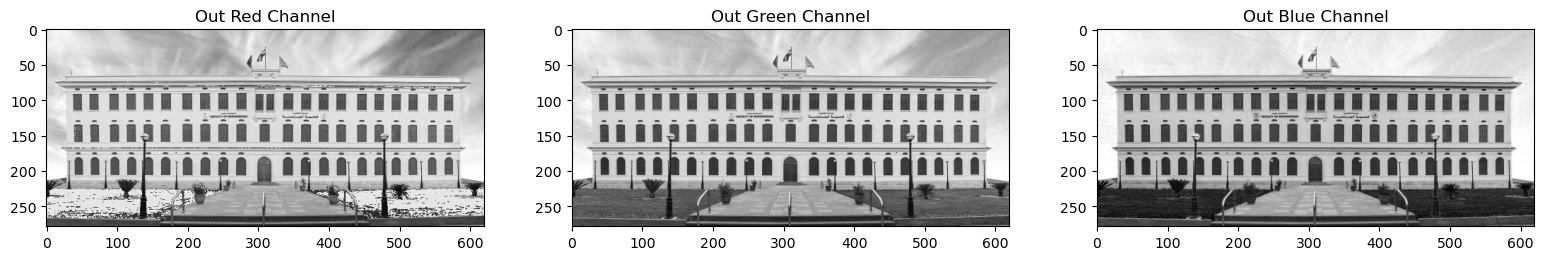

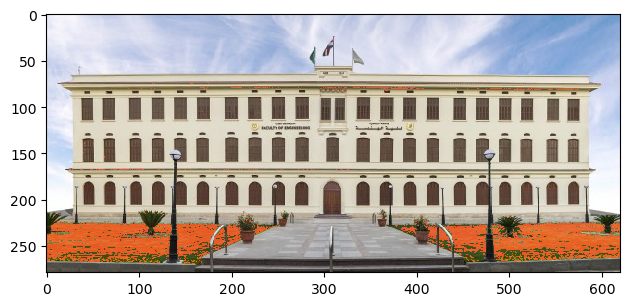

In [6]:
# 1- Get the required RGB color (Using a color picker)

# 2- Read image

# 3- extract R, G and B channels (as float)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)

# 6-  create a mask by thresholding the differences

# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40

# 8- show the image or save it

img = io.imread('imgs/exp2/cufe.png')
img = img.astype(float)/255
# print(img)
io.imshow(img)
io.show()

imgR = img[:,:,0]
imgG = img[:,:,1]
imgB = img[:,:,2]
r, g, b = 85.0/255, 107.0/255, 43.0/255

thR = 20
thG = 25
thB = 20

outR = imgR.copy()
outG = imgG.copy()
outB = imgB.copy()
outR[(-thR/255 < outR-r) & (outR-r < thR/255) & (-thG/255 < outG-g) & (outG-g < thG/255) & (-thB/255 < outB-b) & (outB-b < thB/255)] = 230/255
outG[(-thG/255 < outG-g) & (outG-g < thG/255) & (-thB/255 < outB-b) & (outB-b < thB/255) & (-thR/255 < outR-r) & (outR-r < thR/255)] = 90/255
outB[(-thB/255 < outB-b) & (outB-b < thB/255) & (-thG/255 < outG-g) & (outG-g < thG/255) & (-thR/255 < outR-r) & (outR-r < thR/255)] = 40/255

out = np.dstack((outR, outG, outB))

show_images([imgR, imgG, imgB], ['Red Channel', 'Green Channel', 'Blue Channel'])
show_images([outR, outG, outB], ['Out Red Channel', 'Out Green Channel', 'Out Blue Channel'])

io.imshow(out)
io.show()